**Problem:**

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


Performing the analysis on **Sparkling.csv** dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
df_1 = pd.read_csv("/content/drive/My Drive/GL-DSBA-20-21/Time Series/Project/Sparkling.csv")

In [ ]:
df_1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [ ]:
df_1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [ ]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [ ]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_1.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [ ]:
df_1.tail()

YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

In [ ]:
rcParams['figure.figsize'] = 20,8

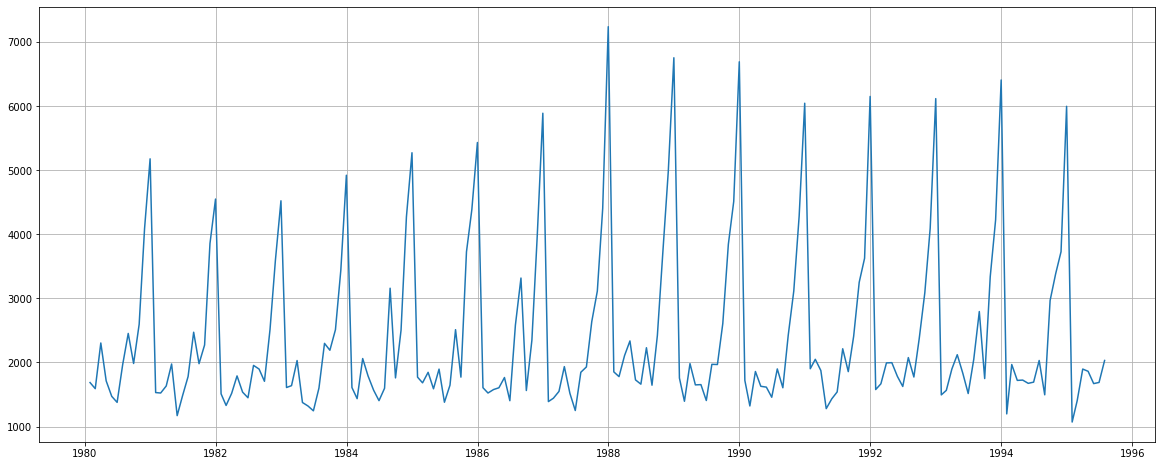

In [ ]:
plt.plot(df_1['Time_Stamp'],df_1['Sparkling']);
plt.grid();


In [ ]:
df_1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [ ]:
df_1.set_index('Time_Stamp',inplace=True)
df_1.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [ ]:
df_1.drop(['YearMonth'], axis = 1, inplace = True) 
df_1.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [ ]:
df_1.isnull().sum()

Sparkling    0
dtype: int64

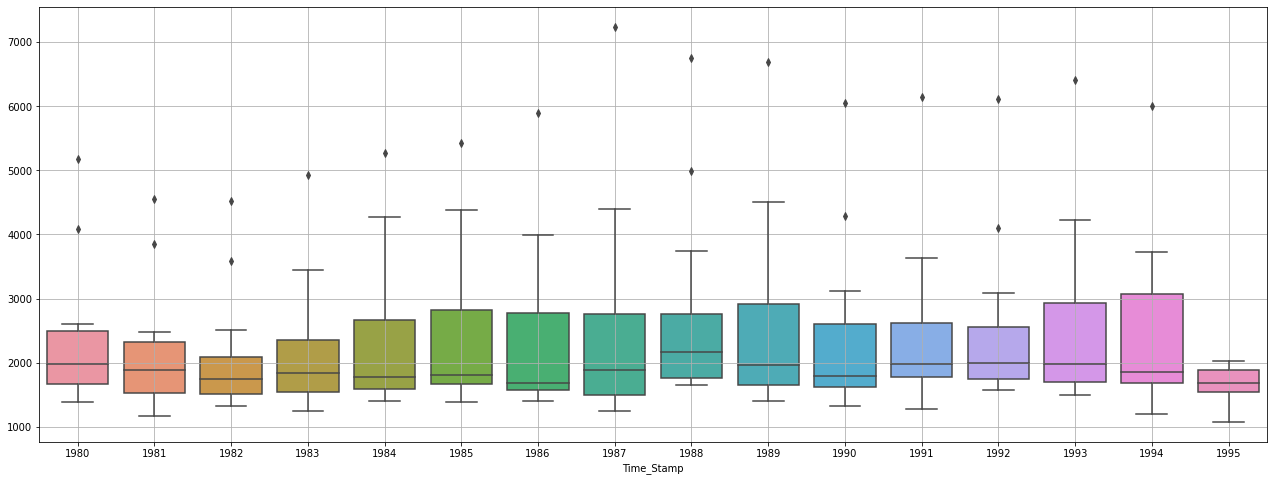

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df_1.values[:,0],ax=ax)
plt.grid();

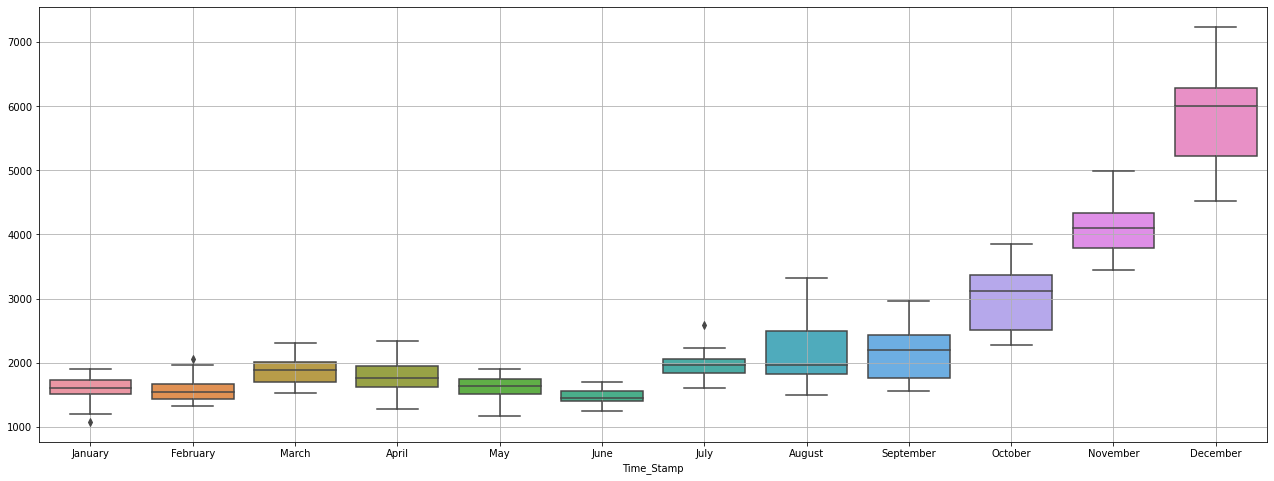

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.month_name(),y = df_1.values[:,0],ax=ax)
plt.grid();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



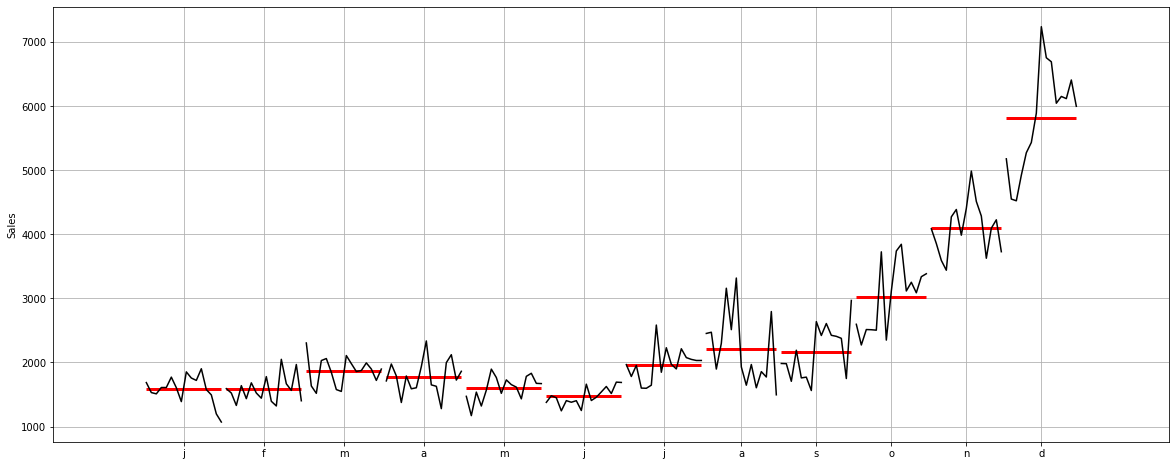

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_1['Sparkling'],ylabel='Sales')
plt.grid();

In [ ]:
monthly_sales_across_years = pd.pivot_table(df_1, values = 'Sparkling', columns = df_1.index.month, index = df_1.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4   ...      9       10      11      12
Time_Stamp                                  ...                                
1980        1686.0  1591.0  2304.0  1712.0  ...  1984.0  2596.0  4087.0  5179.0
1981        1530.0  1523.0  1633.0  1976.0  ...  1981.0  2273.0  3857.0  4551.0
1982        1510.0  1329.0  1518.0  1790.0  ...  1706.0  2514.0  3593.0  4524.0
1983        1609.0  1638.0  2030.0  1375.0  ...  2191.0  2511.0  3440.0  4923.0
1984        1609.0  1435.0  2061.0  1789.0  ...  1759.0  2504.0  4273.0  5274.0
1985        1771.0  1682.0  1846.0  1589.0  ...  1771.0  3727.0  4388.0  5434.0
1986        1606.0  1523.0  1577.0  1605.0  ...  1562.0  2349.0  3987.0  5891.0
1987        1389.0  1442.0  1548.0  1935.0  ...  2638.0  3114.0  4405.0  7242.0
1988        1853.0  1779.0  2108.0  2336.0  ...  2421.0  3740.0  4988.0  6757.0
1989        1757.0  1394.0  1982.0  1650.0  ...  2608.0  3845.0  4514.0  6694.0
1990        1720.0  1321.0  1859.0  1628.0  ...  2424.0  3116.0  4286.0  6047.0
1991        1902.0  2049.0  1874.0  1279.0  ...  2408.0  3252.0  3627.0  6153.0
1992        1577.0  1667.0  1993.0  1997.0  ...  2377.0  3088.0  4096.0  6119.0
1993        1494.0  1564.0  1898.0  2121.0  ...  1749.0  3339.0  4227.0  6410.0
1994        1197.0  1968.0  1720.0  1725.0  ...  2968.0  3385.0  3729.0  5999.0
1995        1070.0  1402.0  1897.0  1862.0  ...     NaN     NaN     NaN     NaN

[16 rows x 12 columns]

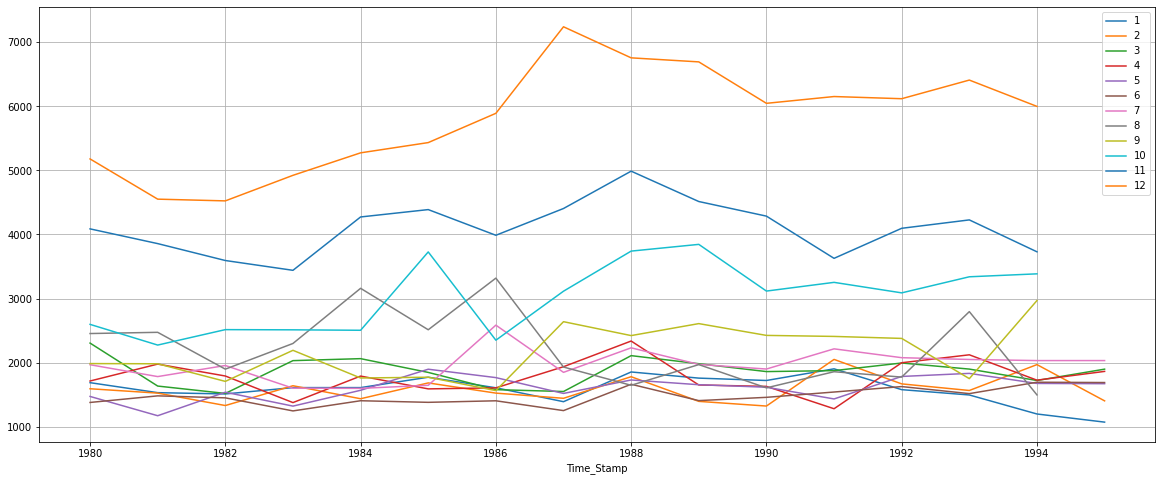

In [ ]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

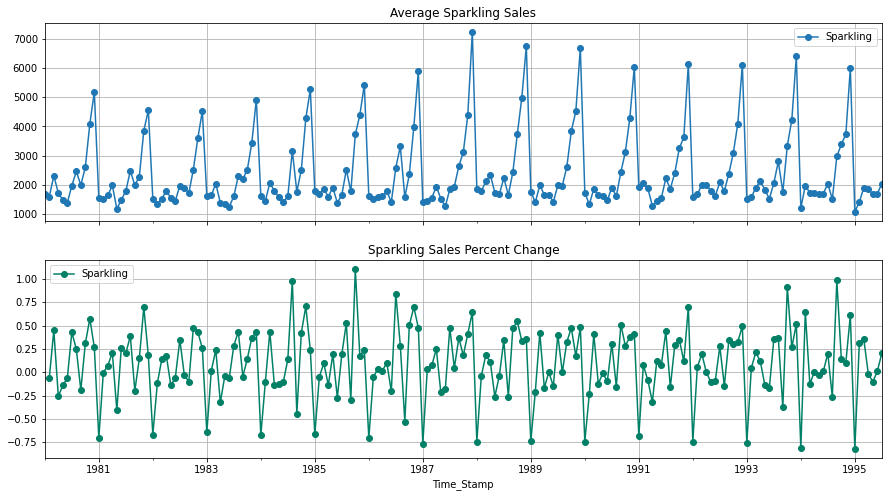

In [ ]:
# group by date and get average Sparkling, and precent change
average    = df_1.groupby(df_1.index)["Sparkling"].mean()
pct_change = df_1.groupby(df_1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparklings over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

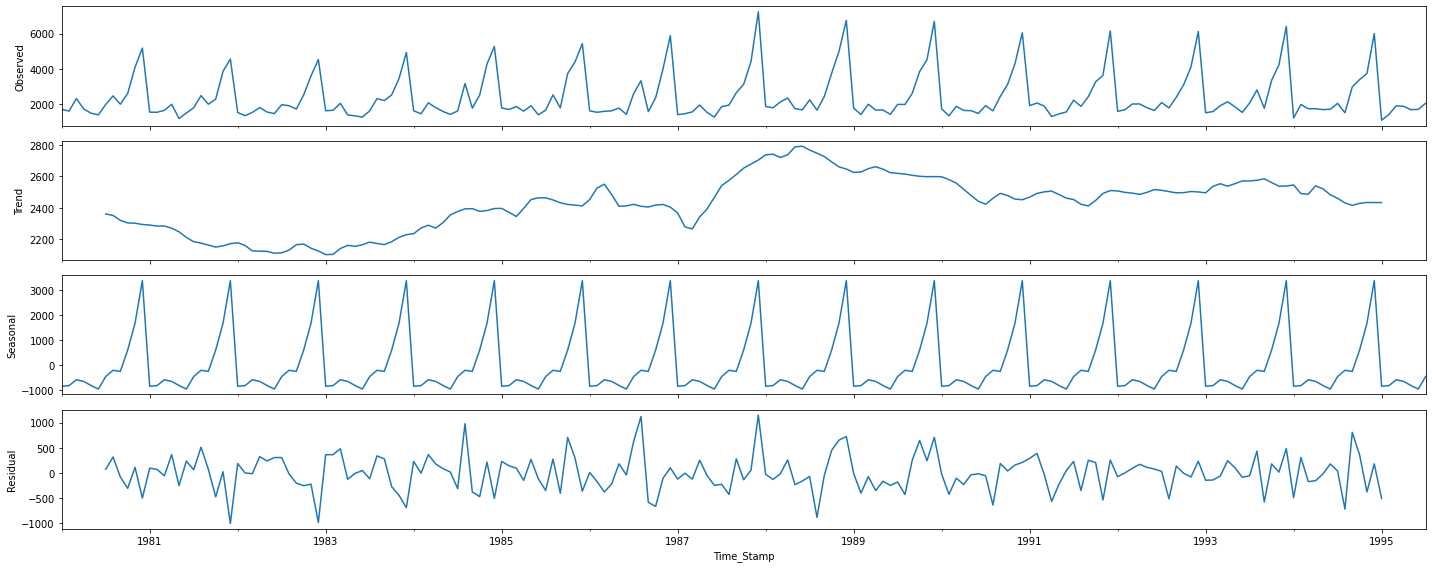

In [ ]:
decomposition = seasonal_decompose(df_1['Sparkling'],model='additive')
decomposition.plot();

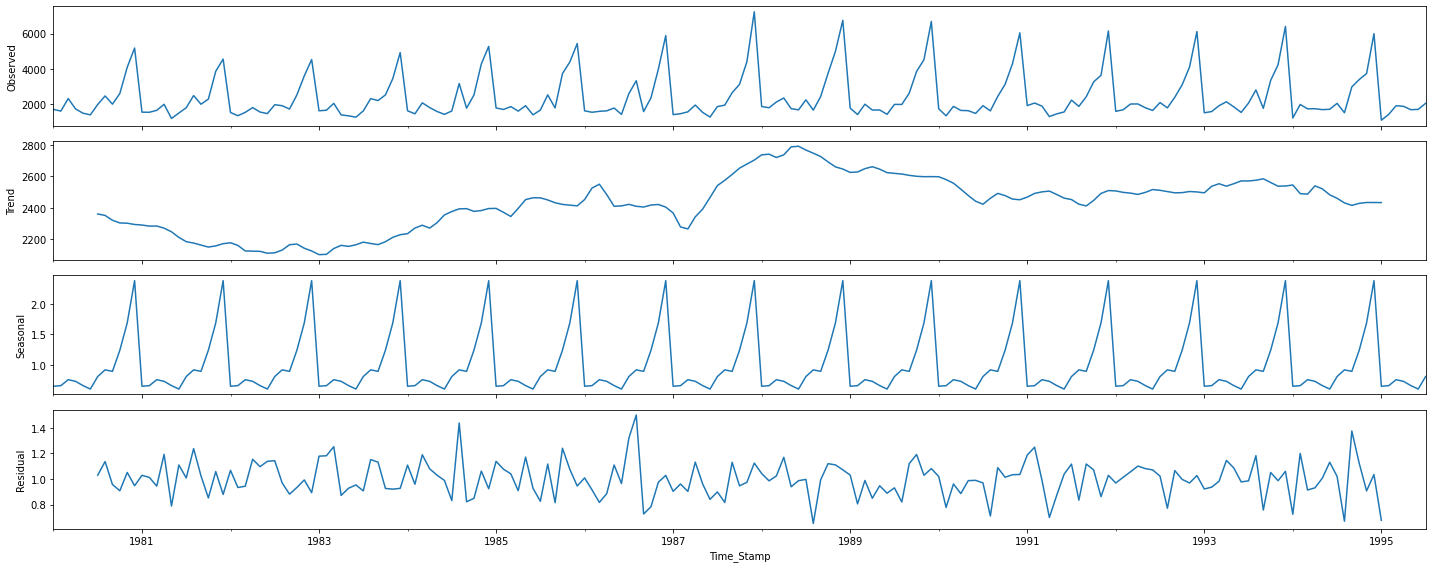

In [ ]:
decomposition_m = seasonal_decompose(df_1['Sparkling'],model='multiplicative')
decomposition_m.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307

In [ ]:
train    =   df_1[0:int(len(df_1)*0.71)] 
test     =   df_1[int(len(df_1)*0.71):]

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [ ]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



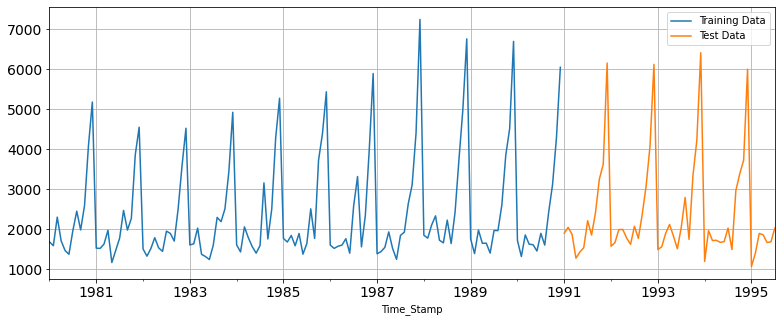

In [ ]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

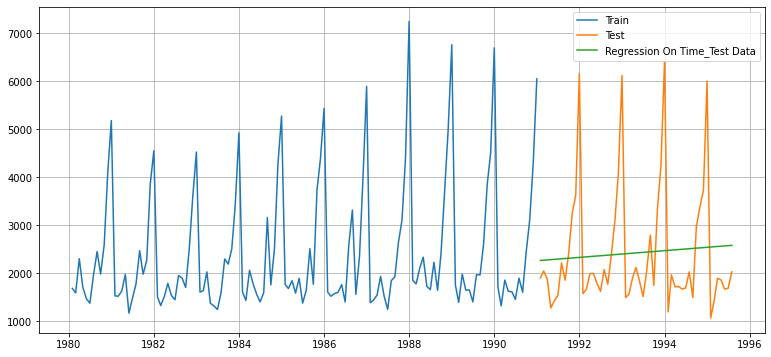

In [ ]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


Test RMSE
RegressionOnTime  1275.867052

Model 2: Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

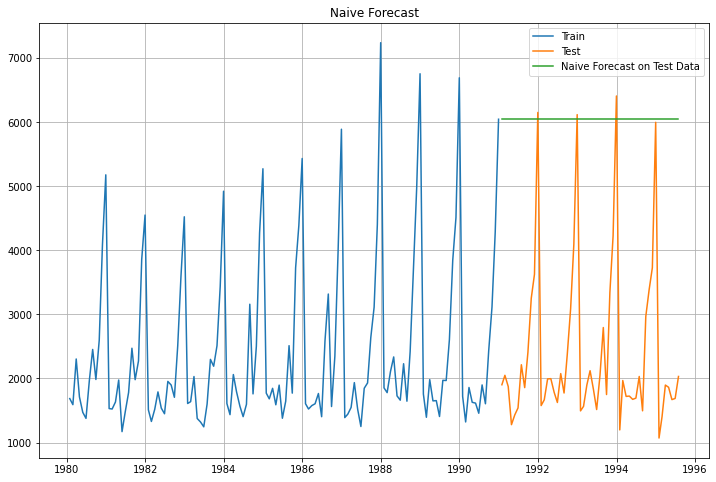

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

Method 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

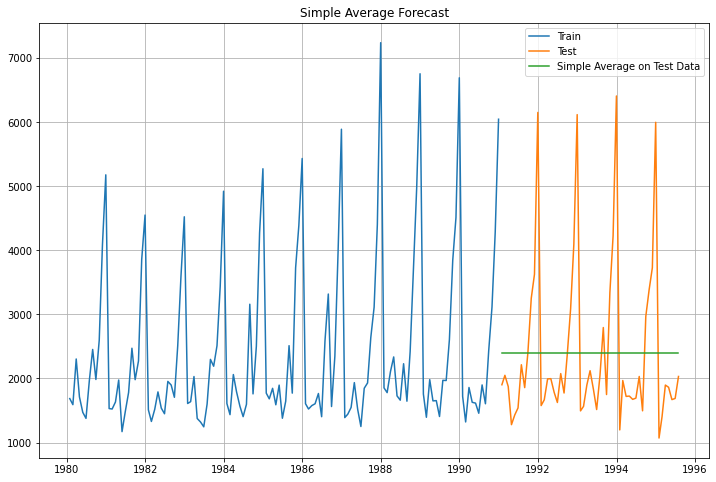

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 1275.082


Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

Method 4: Moving Average(MA)

In [ ]:
MovingAverage = df_1.copy()
MovingAverage.head()


MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

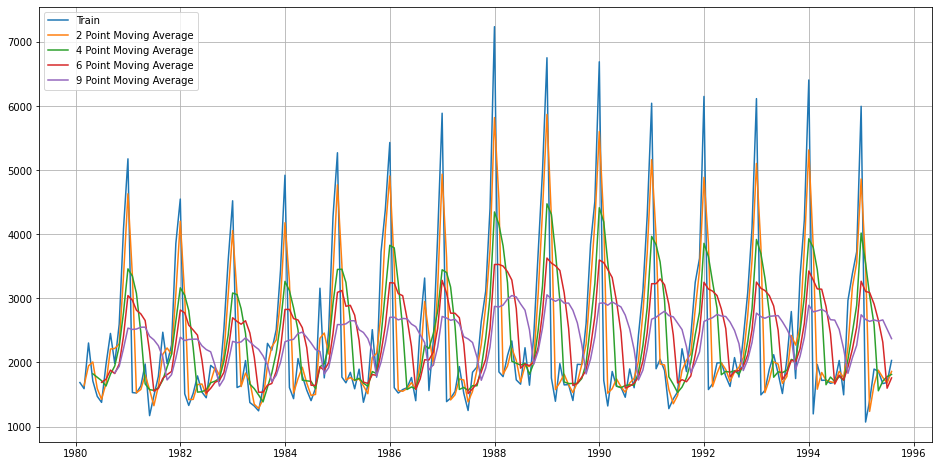

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

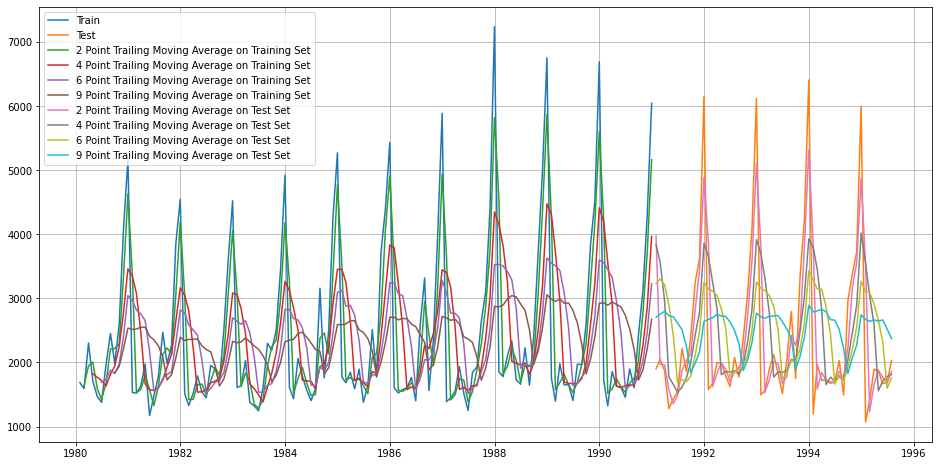

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

Method 5: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True, smoothing_level=0.995)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [ ]:
model_SES_autofit.params


{'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.995,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  6038.165663
1991-02-28       2049  6038.165663
1991-03-31       1874  6038.165663
1991-04-30       1279  6038.165663
1991-05-31       1432  6038.165663

In [ ]:
SES_test.tail()

Sparkling      predict
Time_Stamp                        
1995-03-31       1897  6038.165663
1995-04-30       1862  6038.165663
1995-05-31       1670  6038.165663
1995-06-30       1688  6038.165663
1995-07-31       2031  6038.165663

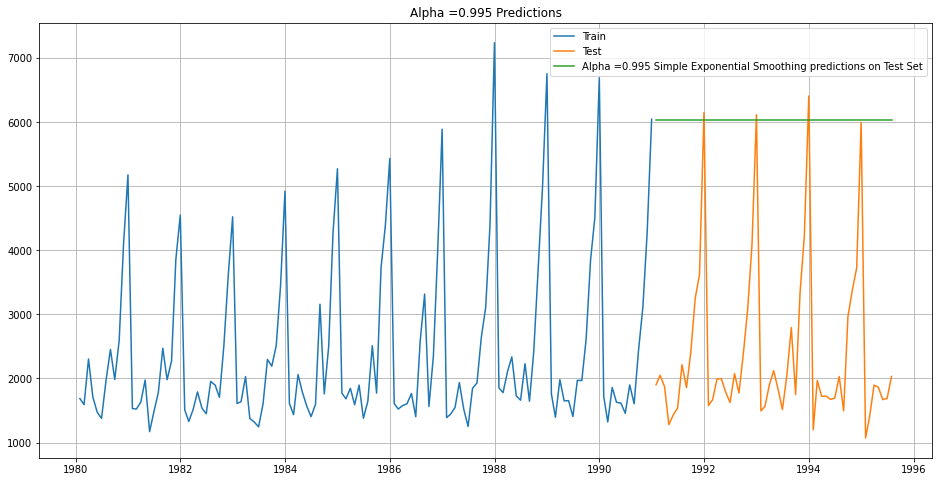

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [ ]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 3855.941


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1275.867052
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.995,SimpleExponentialSmoothing  3855.940897

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [ ]:
resultsDf_model

Alpha Values    Test RMSE
0           0.01  1281.032699
1           0.02  1279.495201
2           0.03  1293.110073
3           0.04  1305.462953
4           0.05  1316.411742
..           ...          ...
94          0.95  3778.432623
95          0.96  3796.048620
96          0.97  3813.437370
97          0.98  3830.602869
98          0.99  3847.548965

[99 rows x 2 columns]

In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values    Test RMSE
1           0.02  1279.495201
0           0.01  1281.032699
2           0.03  1293.110073
3           0.04  1305.462953
4           0.05  1316.411742
..           ...          ...
94          0.95  3778.432623
95          0.96  3796.048620
96          0.97  3813.437370
97          0.98  3830.602869
98          0.99  3847.548965

[99 rows x 2 columns]

In [ ]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                           ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        1275.867052
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.995,SimpleExponentialSmoothing  3855.940897
Alpha=0.02,SimpleExponentialSmoothing   1279.495201

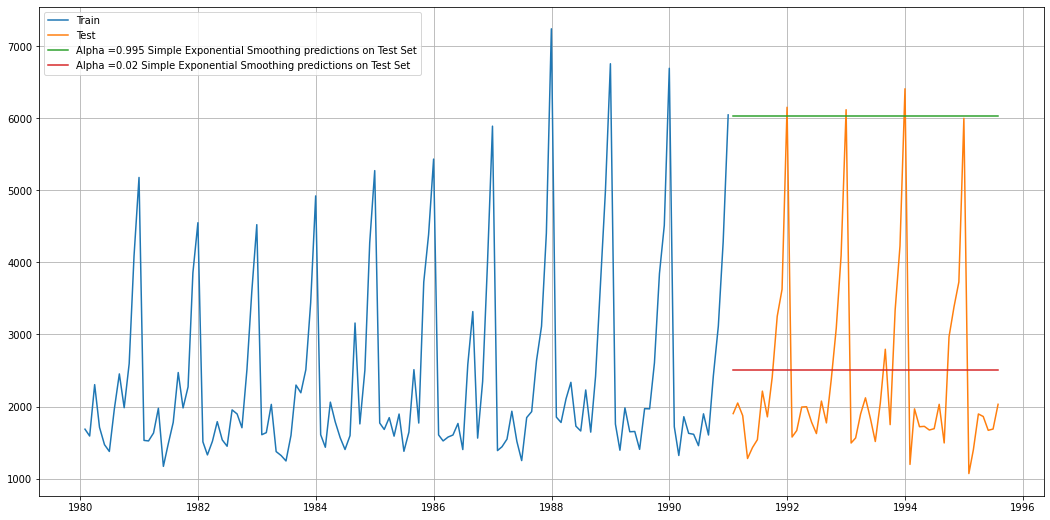

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

Method 6: Double Exponential Smoothing (Holt's Model)

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Sparkling'])

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_7

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [ ]:
resultsDf_7

Alpha Values  Beta Values     Test RMSE
0             0.01         0.01   6336.376572
1             0.01         0.02   3631.150072
2             0.01         0.03   1839.356840
3             0.01         0.04   1471.745468
4             0.01         0.05   2105.190091
...            ...          ...           ...
9796          0.99         0.95  58827.192994
9797          0.99         0.96  59032.966109
9798          0.99         0.97  59235.912466
9799          0.99         0.98  59436.052592
9800          0.99         0.99  59633.400123

[9801 rows x 3 columns]

In [ ]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values     Test RMSE
148           0.02         0.50   1274.630824
115           0.02         0.17   1275.105310
254           0.03         0.57   1276.025836
255           0.03         0.58   1278.425944
253           0.03         0.56   1278.585750
...            ...          ...           ...
2175          0.22         0.97  60335.137153
2077          0.21         0.98  60589.909084
2176          0.22         0.98  60740.944412
2177          0.22         0.99  61104.414936
2078          0.21         0.99  61161.469936

[9801 rows x 3 columns]

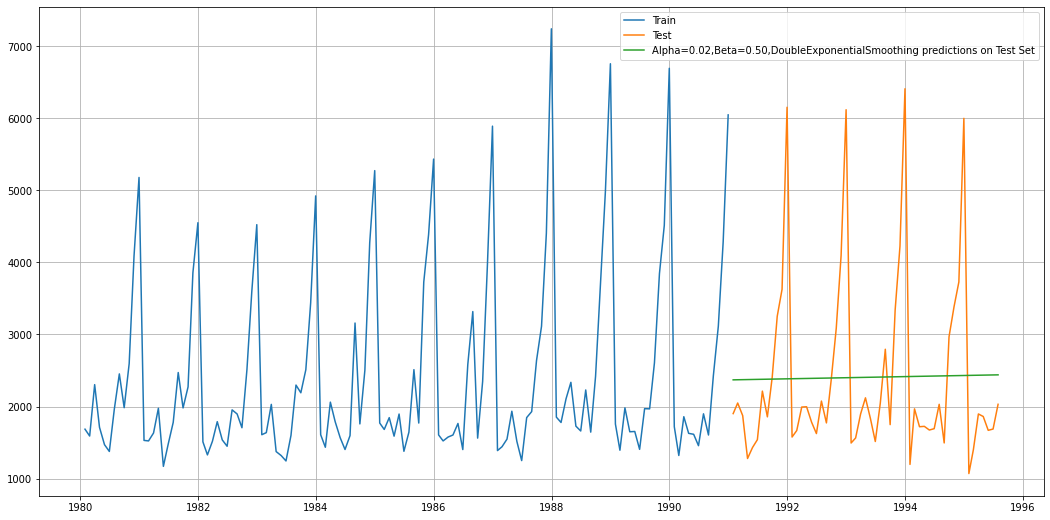

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.02,0.5], label='Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing'])
resultsDf_7_1

Test RMSE
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing  1274.630824

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                 1275.867052
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                       813.400684
4pointTrailingMovingAverage                      1156.589694
6pointTrailingMovingAverage                      1283.927428
9pointTrailingMovingAverage                      1346.278315
Alpha=0.995,SimpleExponentialSmoothing           3855.940897
Alpha=0.02,SimpleExponentialSmoothing            1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing  1274.630824

Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [ ]:
model_TES_autofit = model_TES.fit()

In [ ]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1685.012792659747,
 'initial_seasons': array([  38.53437848,  -37.58205472,  464.84418171,  205.8317736 ,
        -140.67468508, -156.94463912,  338.18645503,  856.3663037 ,
         402.95623136,  971.15074363, 2401.43787839, 3426.35728898]),
 'initial_slope': 1.9144384621230306e-09,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.08622068066400991,
 'smoothing_seasonal': 0.47641579236437037,
 'smoothing_slope': 1.0548986177830093e-09,
 'use_boxcox': False}

In [ ]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1532.364557
1991-02-28       2049   1241.299611
1991-03-31       1874   1726.710821
1991-04-30       1279   1584.229829
1991-05-31       1432   1493.939460

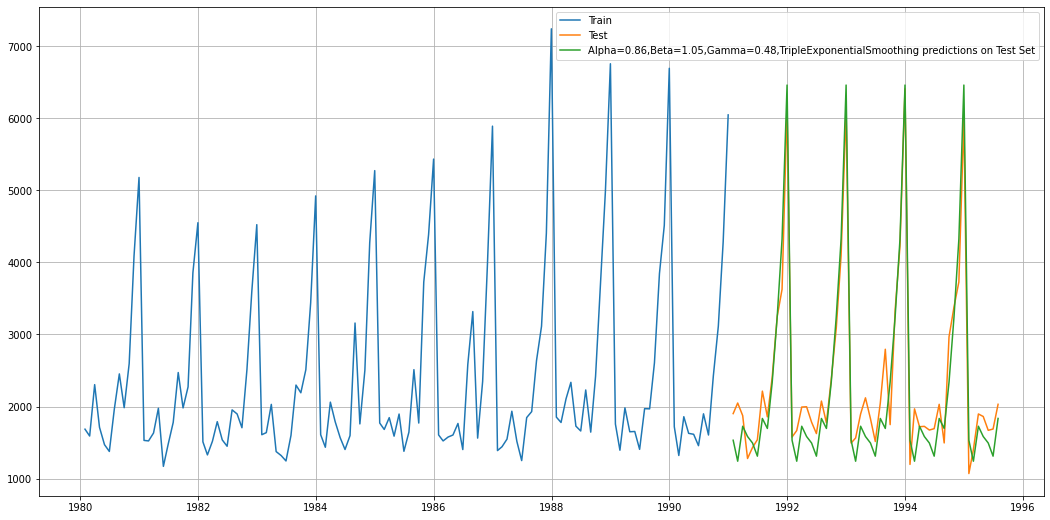

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.86,Beta=1.05,Gamma=0.48, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.86,Beta=1.05,Gamma=0.48, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 362.806


In [ ]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115

In [ ]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [ ]:
resultsDf_8_2.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values     Test RMSE
85            0.1          0.9           0.6  3.384584e+02
139           0.2          0.4           1.0  3.388406e+02
110           0.2          0.2           0.1  3.437154e+02
30            0.1          0.4           0.1  3.463027e+02
301           0.4          0.1           0.2  3.651921e+02
..            ...          ...           ...           ...
979           1.0          0.8           1.0  5.432435e+06
997           1.0          1.0           0.8  6.299937e+06
998           1.0          1.0           0.9  2.202785e+07
989           1.0          0.9           1.0  2.370114e+07
999           1.0          1.0           1.0  8.971517e+07

[1000 rows x 4 columns]

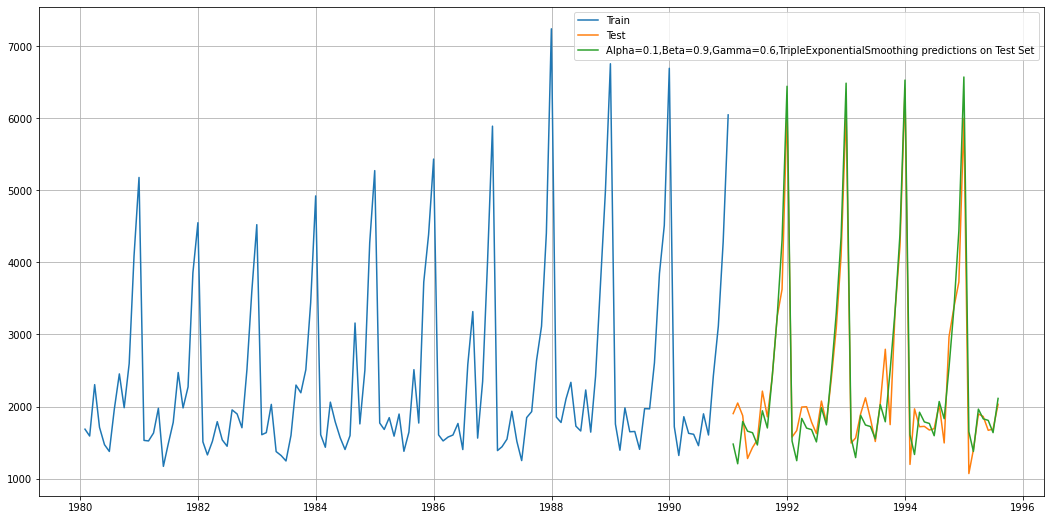

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing'])

resultsDf_8_3

Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  338.458417

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417

In [ ]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
SimpleAverageModel                                  1275.081804
RegressionOnTime                                    1275.867052
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
NaiveModel                                          3864.279352

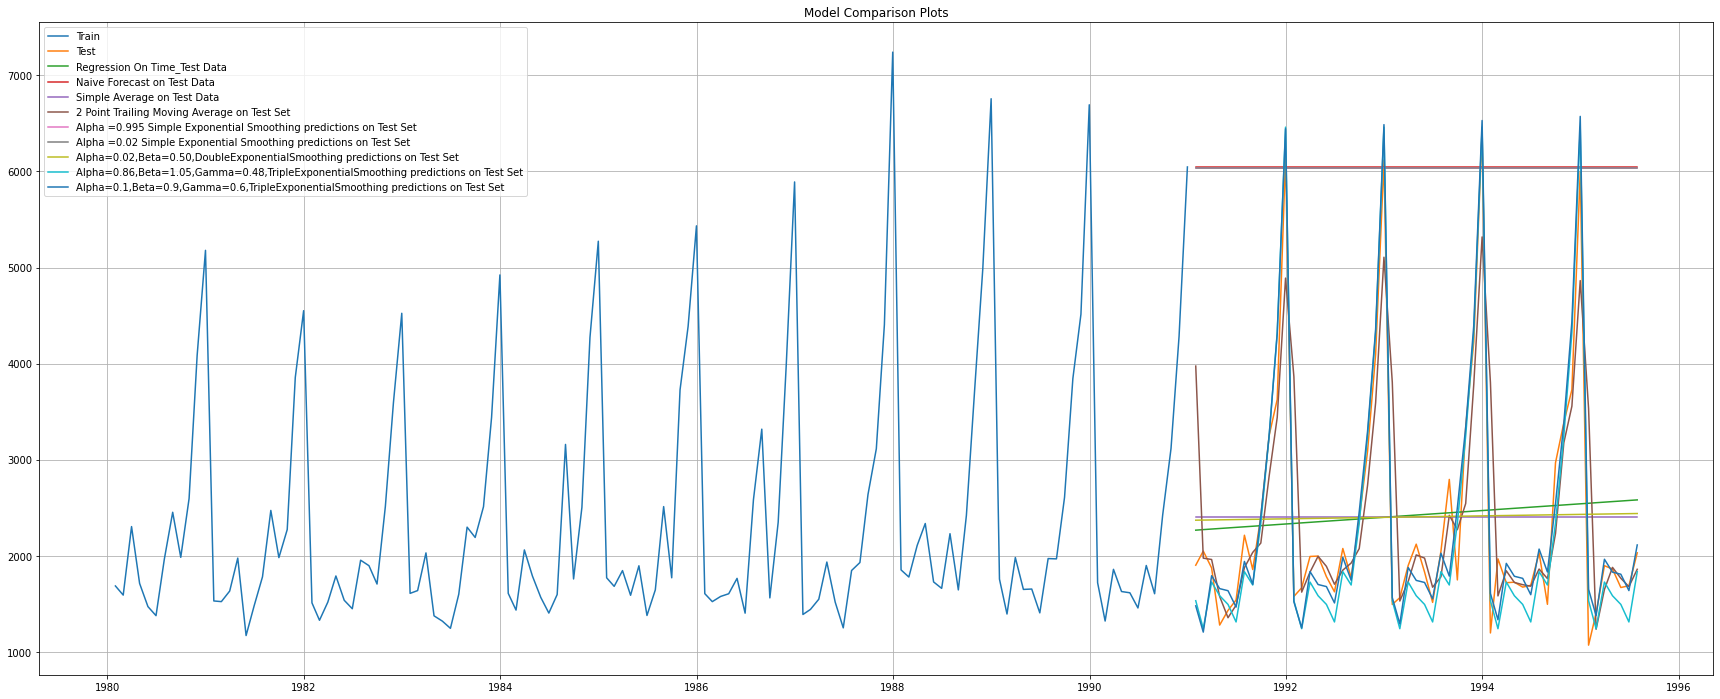

In [ ]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict'], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.02,0.5], label='Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Check for stationarity of the series at  α  = 0.05 using appropriate statistical tests.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

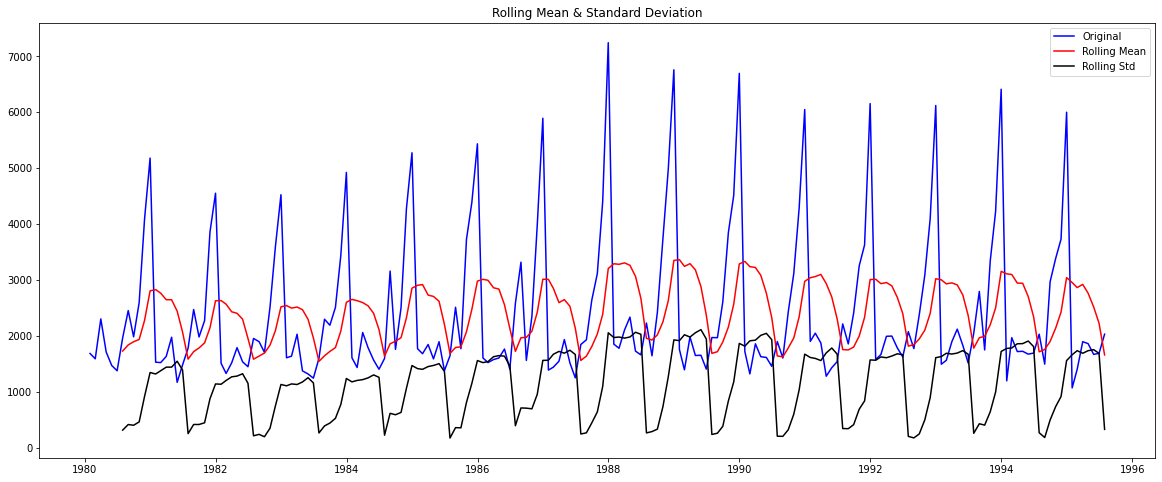

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df_1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

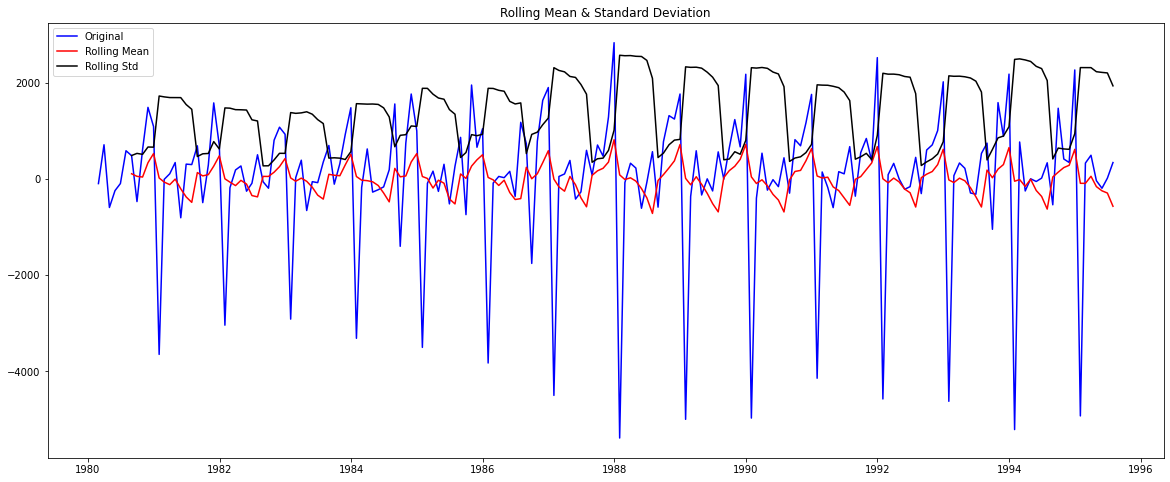

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df_1['Sparkling'].diff().dropna())

After taking a difference of order 1, we see that at  α  = 0.05 the Time Series is indeed stationary.

In [ ]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


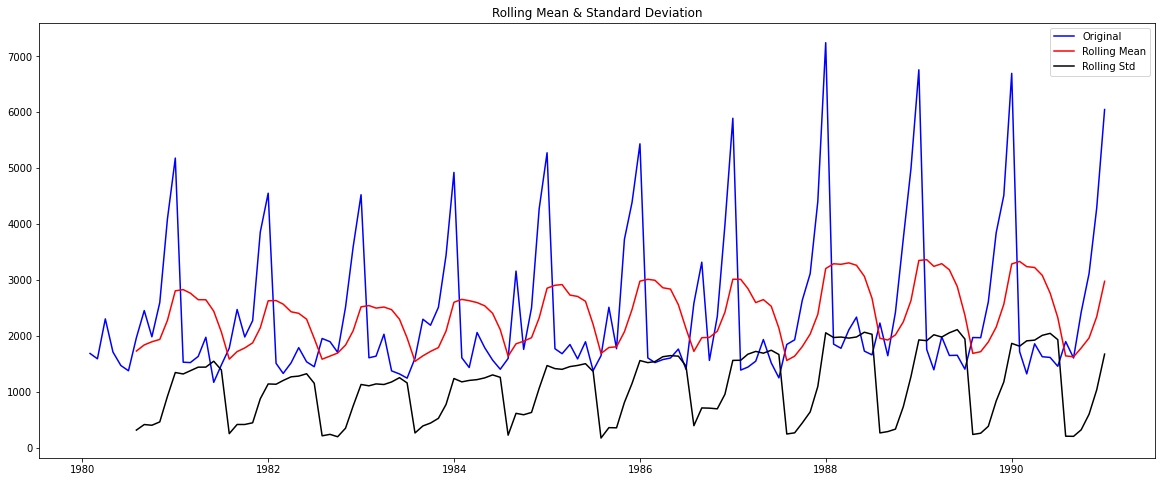

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [ ]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  α  = 0.05

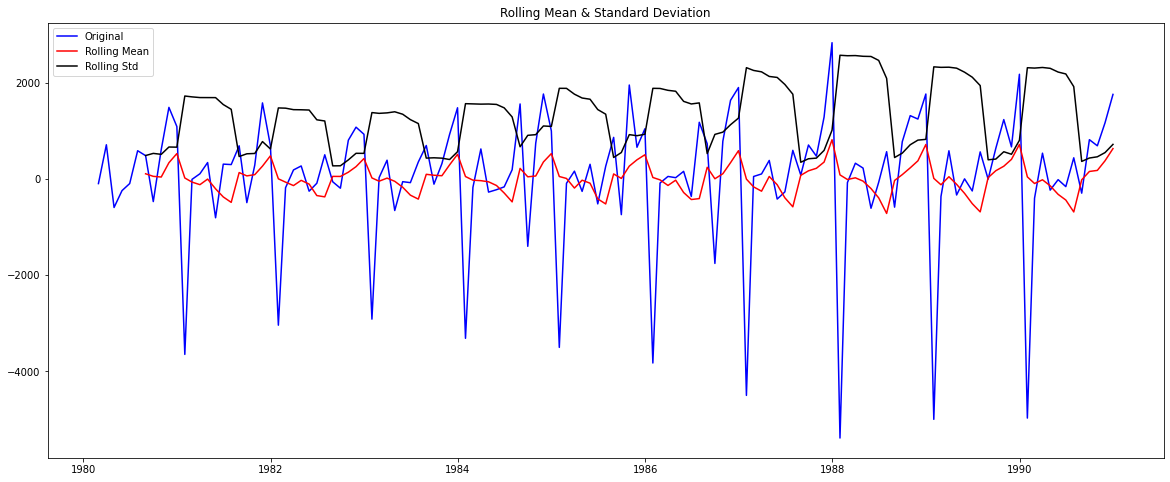

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [ ]:
test_stationarity(train['Sparkling'].diff().dropna())

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


Method 7: ARIMA Model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.783097684156
ARIMA(1, 1, 0) - AIC:2268.5280608424086
ARIMA(1, 1, 1) - AIC:2235.0139453496545
ARIMA(1, 1, 2) - AIC:2233.5976471188533
ARIMA(2, 1, 0) - AIC:2262.0356000662723
ARIMA(2, 1, 1) - AIC:2232.360489897682
ARIMA(2, 1, 2) - AIC:2210.6191956074945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.619196
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [ ]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1012.891
Date:                Sat, 07 Nov 2020   AIC                           2210.619
Time:                        20:39:01   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5855      0.517     10.807      0.000       4.572       6.599
ar.L1.D.Sparkling     1.2699      0.075     17.045      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)


1374.5090730714737


In [ ]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)_AIC'])

resultsDf_8_4

Test RMSE
ARIMA(2,1,2)_AIC  1374.509073

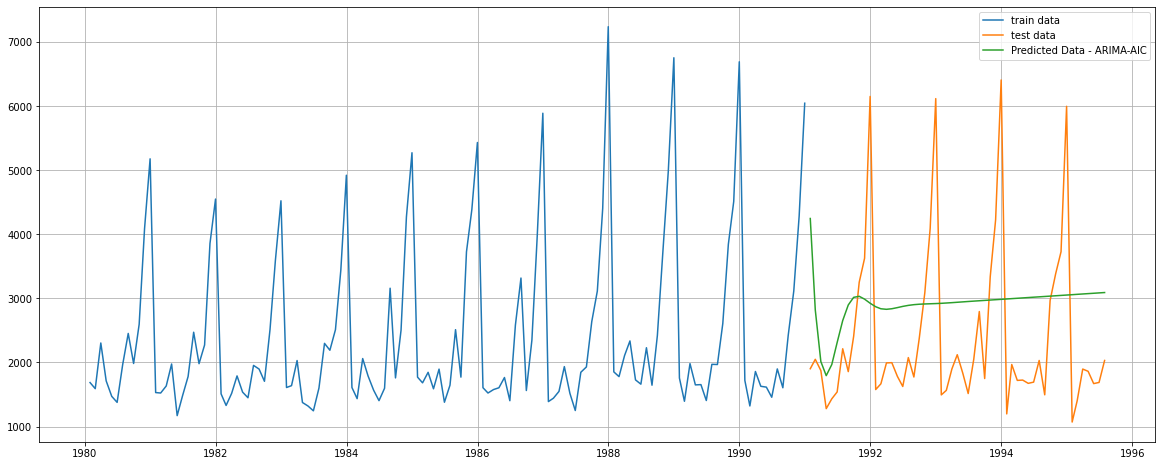

In [ ]:
plt.plot(train,label='train data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA-AIC')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)_AIC                                    1374.509073

Method 8: SARIMA Model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889193
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844431877
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121763489
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.19936175105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805660647
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082816
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339541666
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242877805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813832
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274104711
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510476081
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933046445
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.5764886115714
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687054
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840216106
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151454903234
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234554
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.421558489866
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6938085631189
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079048965
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190986514446
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.8888034366141
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.0782683084585
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.3652245477413
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562166
SARIMA(1, 1, 0)x(1, 0, 1, 6) - 

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678699
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
17  (0, 1, 1)  (2, 0, 2, 6)  1741.576489
44  (1, 1, 1)  (2, 0, 2, 6)  1743.212084
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040755

In [ ]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA  = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA .summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 07 Nov 2020   AIC                           1727.679
Time:                                   20:39:42   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6448      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1069      0.250     -0.428

In [ ]:
predicted_auto_SARIMA  = results_auto_SARIMA.get_forecast(steps=len(test))

In [ ]:
rmse_S = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse_S)

626.8461918585543


In [ ]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse_S]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)_AIC'])

resultsDf_8_5

Test RMSE
SARIMA(1,1,2)(2,0,2,6)_AIC  626.846192

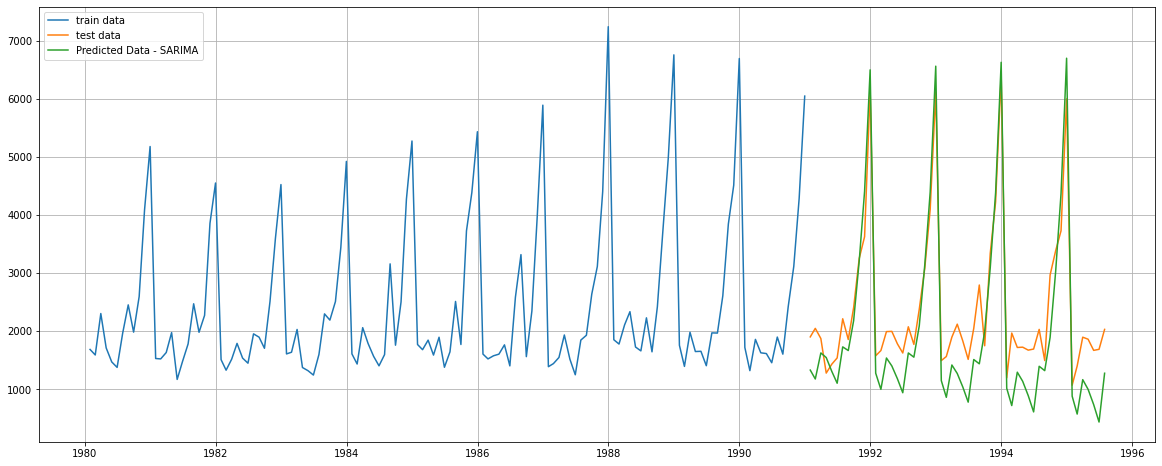

In [ ]:
plt.plot(train,label='train data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)_AIC                                    1374.509073
SARIMA(1,1,2)(2,0,2,6)_AIC                           626.846192

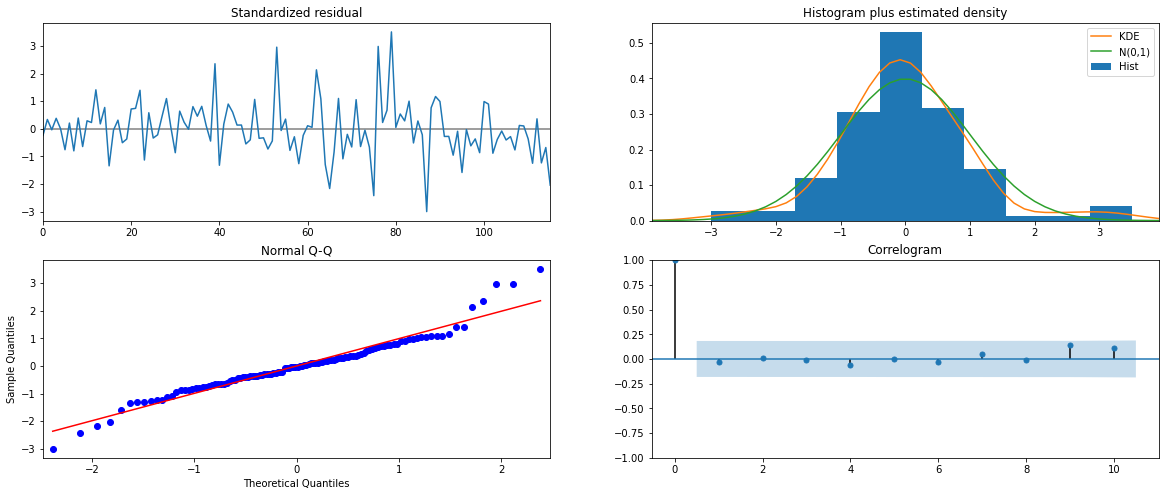

In [ ]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

Method 9: ARIMA Model using cut-off points of ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



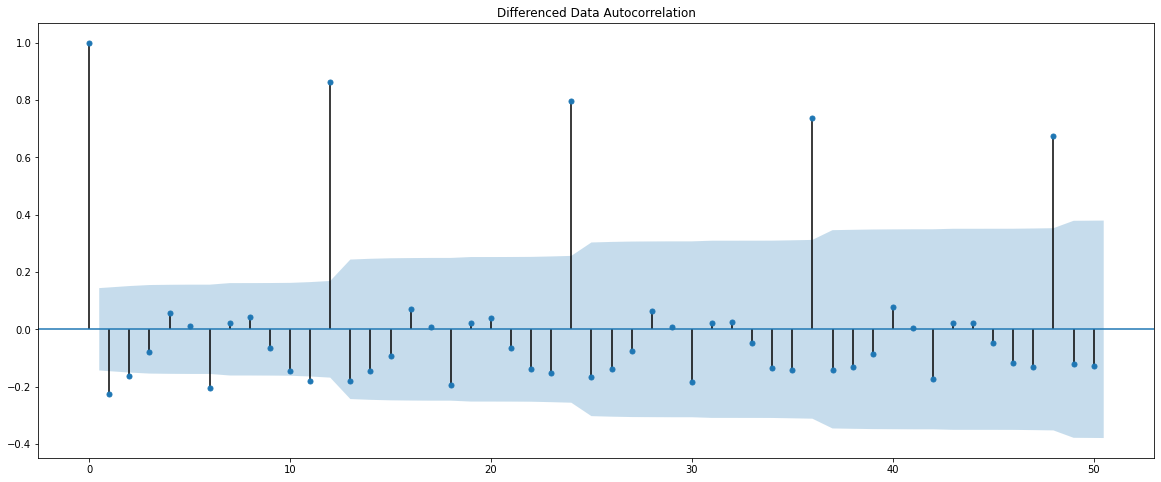

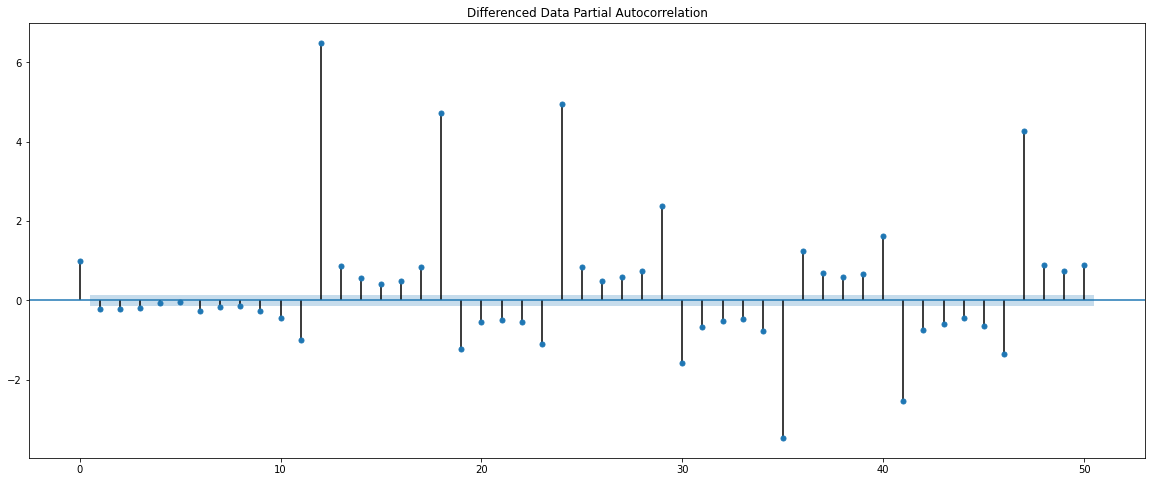

In [ ]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(2,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1106.779
Method:                       css-mle   S.D. of innovations           1101.747
Date:                Sat, 07 Nov 2020   AIC                           2227.559
Time:                        20:39:45   BIC                           2247.685
Sample:                    02-29-1980   HQIC                          2235.737
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9356      3.494      1.699      0.092      -0.912      12.783
ar.L1.D.Sparkling    -0.8545      0.094     -9.127      0.000      -1.038      -0.671
ar.L2.D.Sparkling    -0.

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [ ]:
rmse_ma = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse_ma)

1392.1426925396338


In [ ]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_ma]}
                           ,index=['ARIMA(2,1,3)_ACF-PACF'])

resultsDf_9

Test RMSE
ARIMA(2,1,3)_ACF-PACF  1392.142693

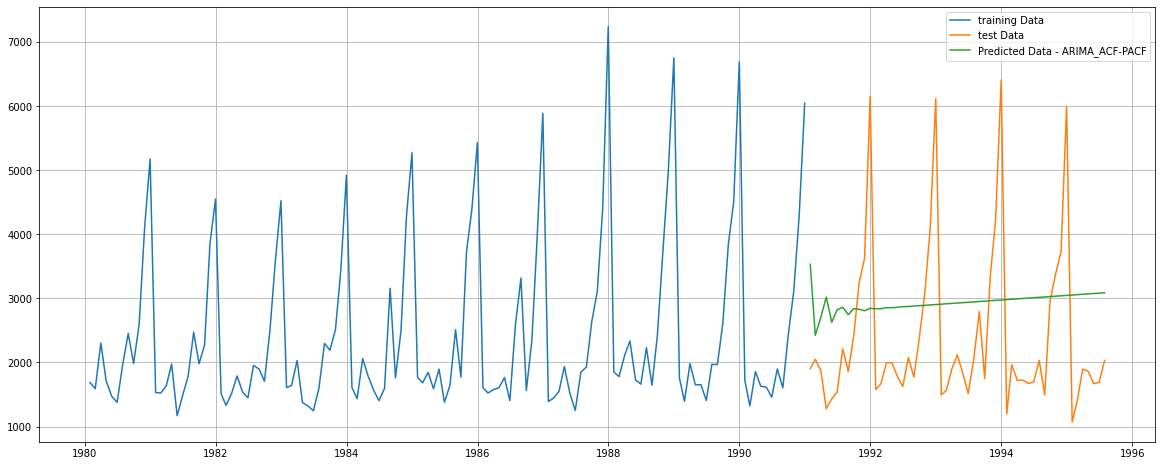

In [ ]:
plt.plot(train,label='training Data')
plt.plot(test,label='test Data')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - ARIMA_ACF-PACF')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)_AIC                                    1374.509073
SARIMA(1,1,2)(2,0,2,6)_AIC                           626.846192
ARIMA(2,1,3)_ACF-PACF                               1392.142693

Method 10: SARIMA Model using cut-off points of ACF and PACF

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



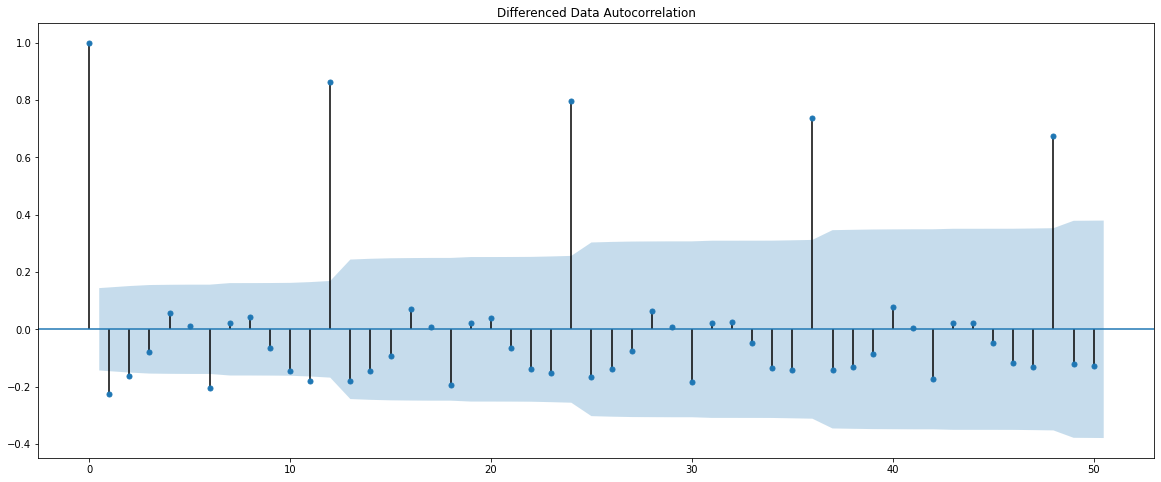

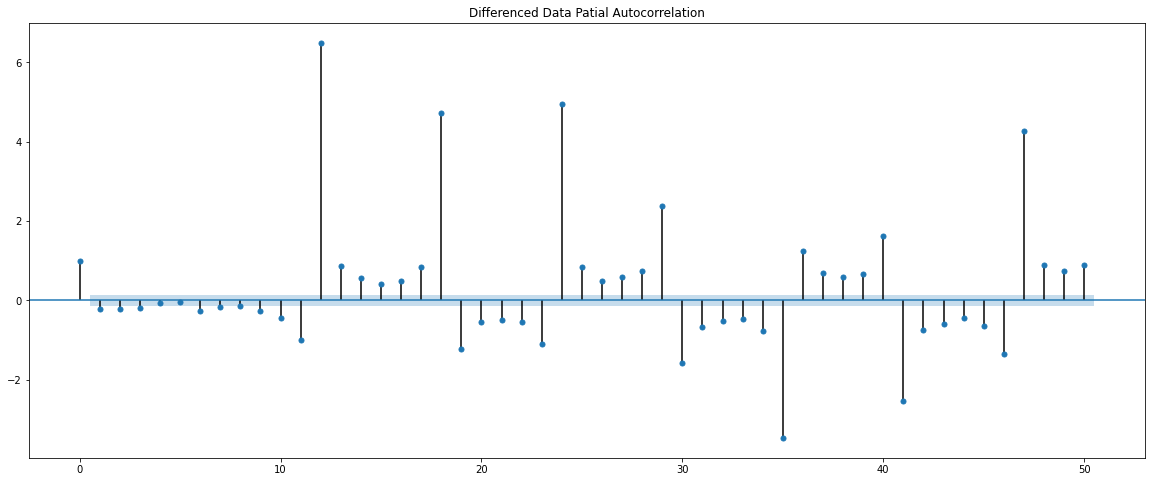

In [ ]:
plot_acf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

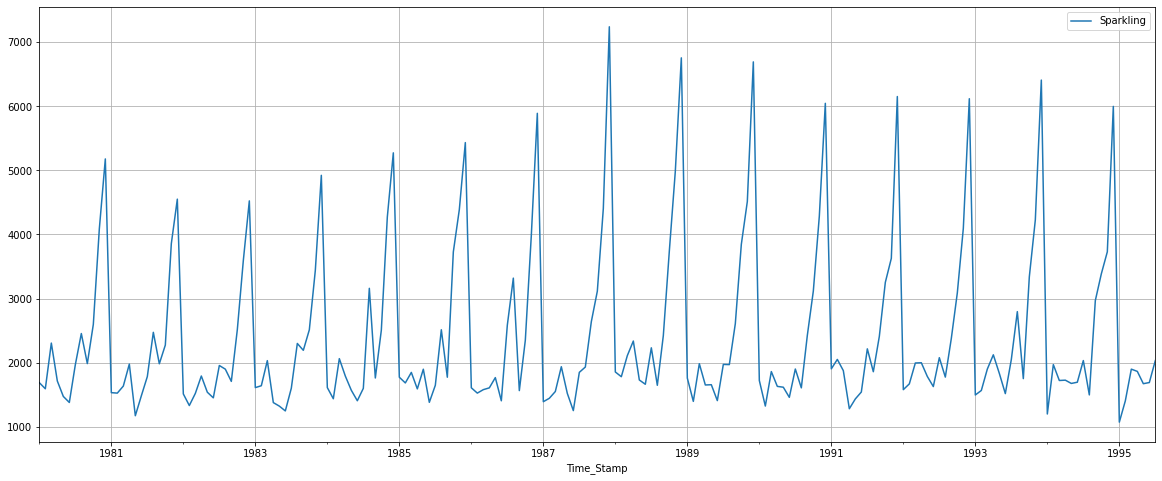

In [ ]:
df_1.plot()
plt.grid();

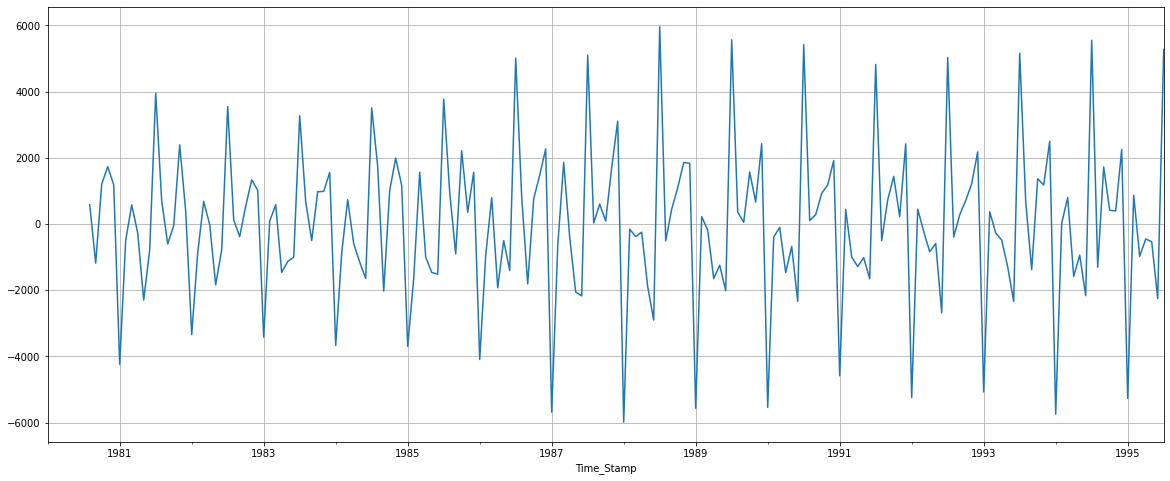

In [ ]:
(df_1['Sparkling'].diff(6)).diff().plot()
plt.grid();

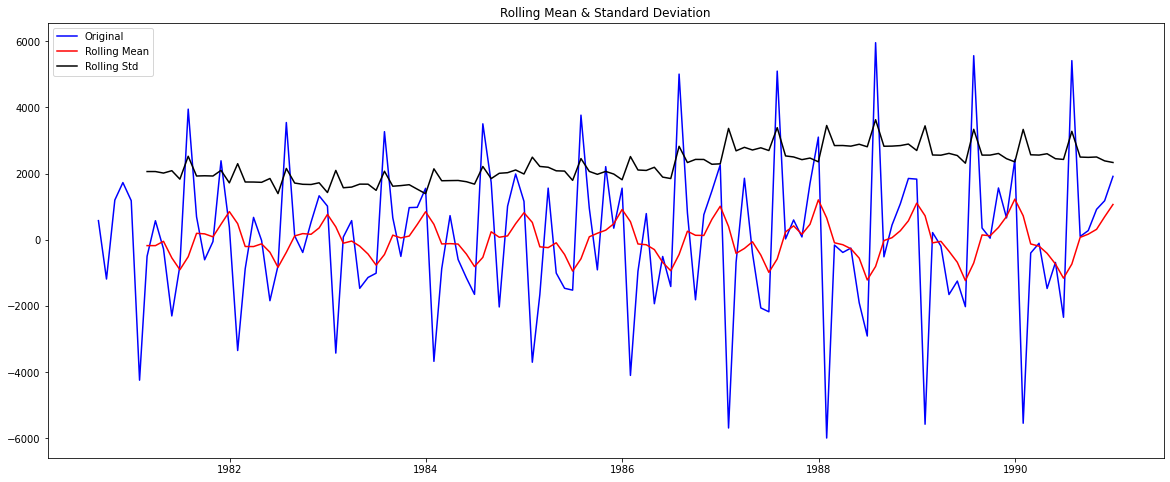

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [ ]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



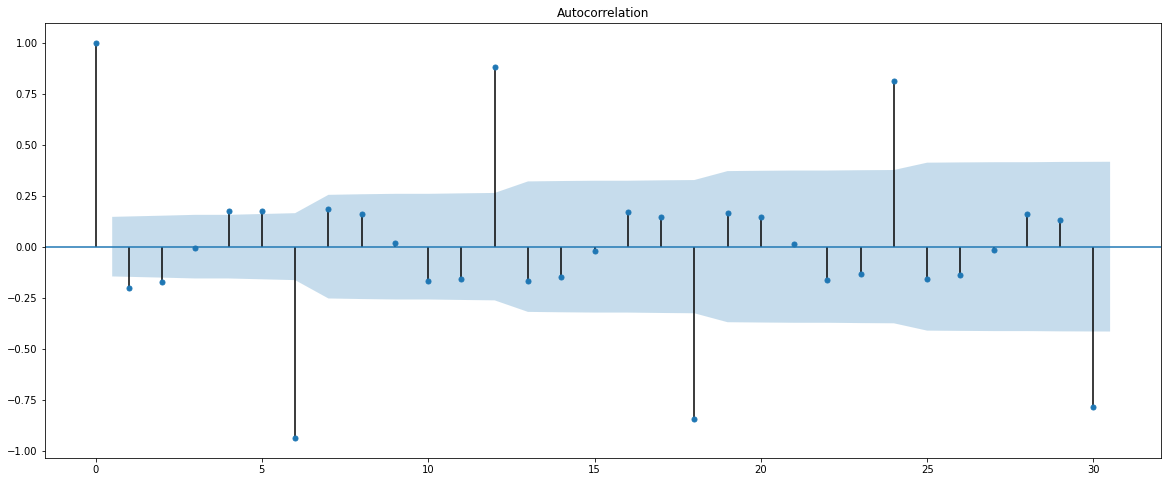

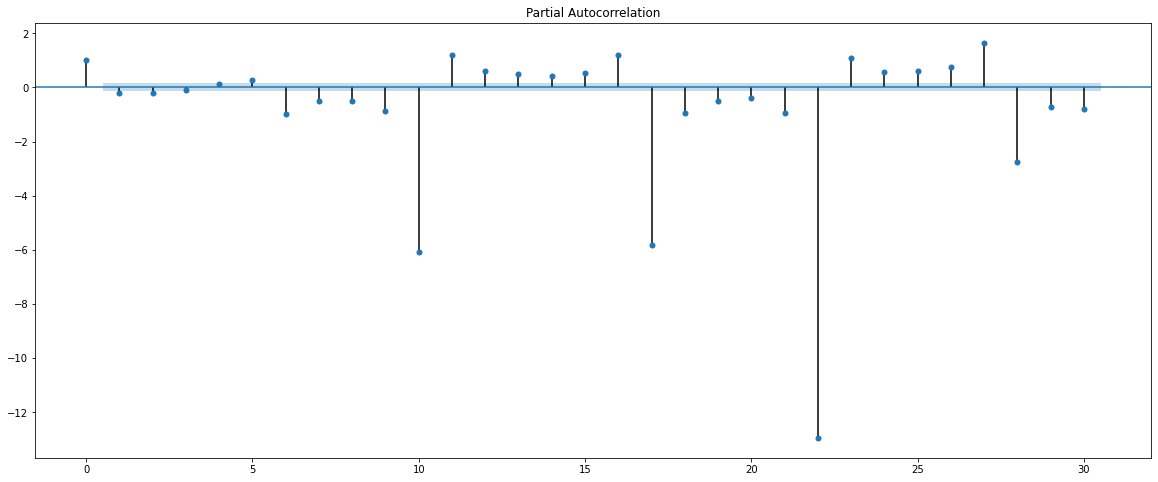

In [ ]:
plot_acf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [ ]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2,1,2),
                                seasonal_order=(2,1,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -814.072
Date:                           Sat, 07 Nov 2020   AIC                           1646.145
Time:                                   20:39:52   BIC                           1670.449
Sample:                                        0   HQIC                          1656.003
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6759      0.868      0.779      0.436      -1.025       2.376
ar.L2         -0.1701      0.123     -1.386

In [ ]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [ ]:
rmse_ms = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse_ms)

685.6659374941241


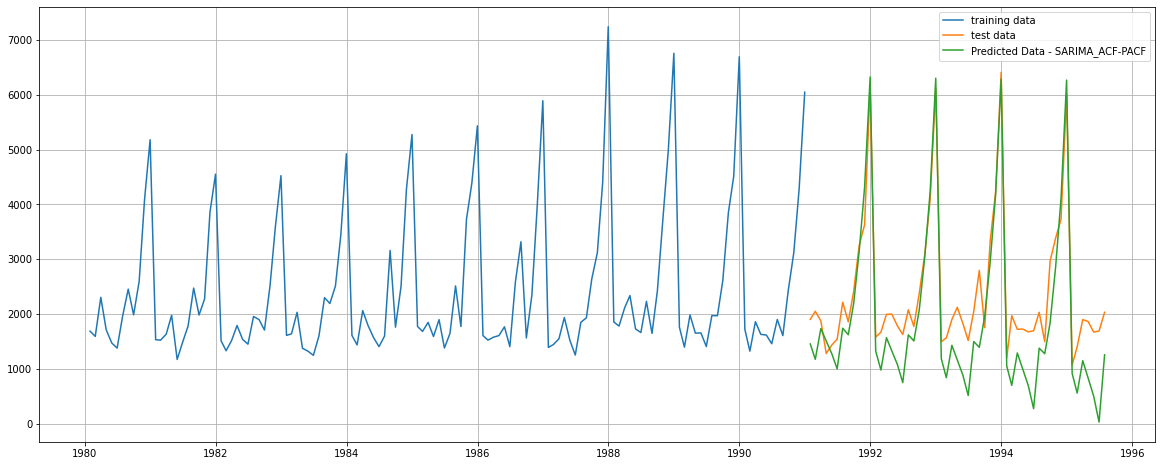

In [ ]:
plt.plot(train,label='training data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA_ACF-PACF')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_ms]}
                           ,index=['SARIMA(2,1,2)(2, 1, 2, 6)_ACF-PACF'])

resultsDf_10

Test RMSE
SARIMA(2,1,2)(2, 1, 2, 6)_ACF-PACF  685.665937

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
ARIMA(2,1,2)_AIC                                    1374.509073
SARIMA(1,1,2)(2,0,2,6)_AIC                           626.846192
ARIMA(2,1,3)_ACF-PACF                               1392.142693
SARIMA(2,1,2)(2, 1, 2, 6)_ACF-PACF                   685.665937

In [ ]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
Alpha=0.86,Beta=1.05,Gamma=0.48,TripleExponenti...   362.806115
SARIMA(1,1,2)(2,0,2,6)_AIC                           626.846192
SARIMA(2,1,2)(2, 1, 2, 6)_ACF-PACF                   685.665937
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing     1274.630824
SimpleAverageModel                                  1275.081804
RegressionOnTime                                    1275.867052
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
ARIMA(2,1,2)_AIC                                    1374.509073
ARIMA(2,1,3)_ACF-PACF                               1392.142693
Alpha=0.995,SimpleExponentialSmoothing              3855.940897
NaiveModel                                          3864.279352

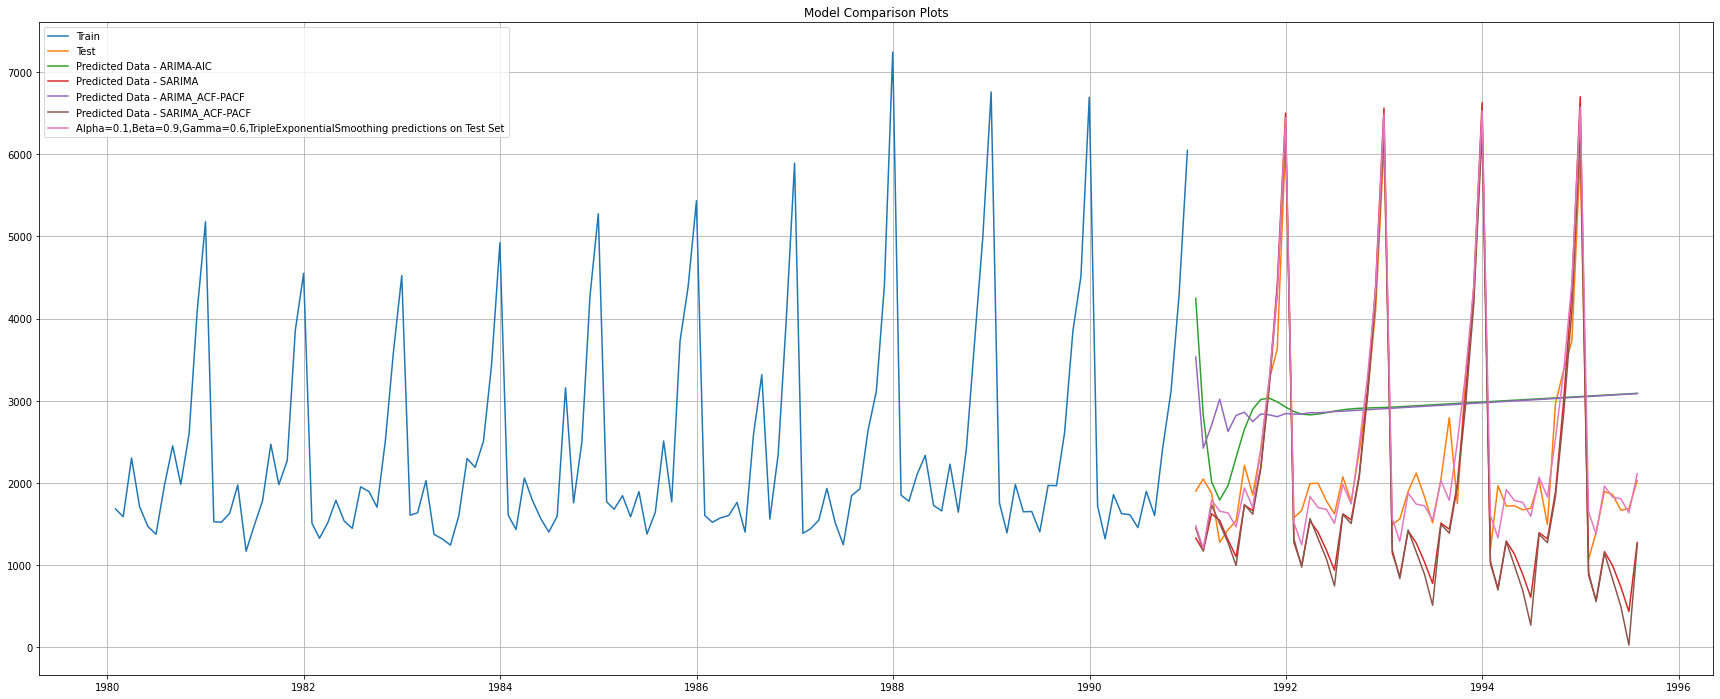

In [ ]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA-AIC')

plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - ARIMA_ACF-PACF')

plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA_ACF-PACF')

plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

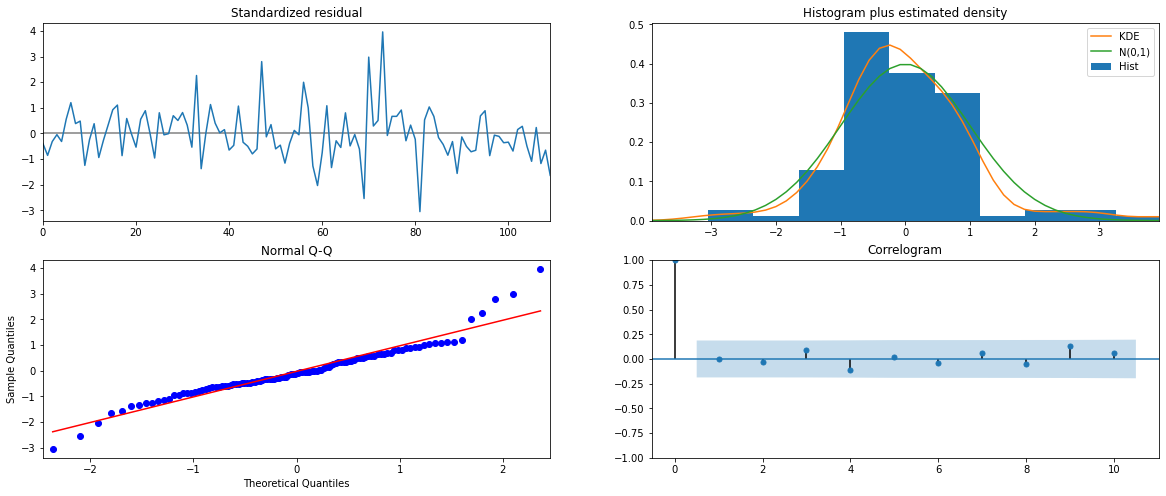

In [ ]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

Evaluate the model on the whole and predict 12 months into the future

In [ ]:
fullmodel1 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.9,
                                                                 smoothing_seasonal=0.6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE :',RMSE_fullmodel1)

RMSE : 480.2872835432753


In [ ]:
prediction_1 = fullmodel1.forecast(steps=12)

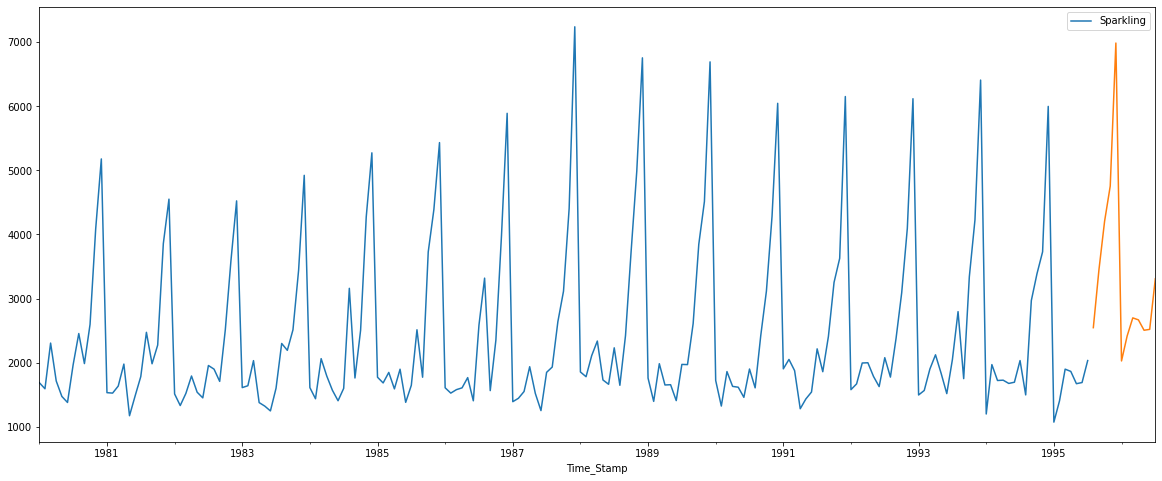

In [ ]:
df_1.plot()
prediction_1.plot();

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1600.881895  2544.745537  3488.609178
1995-09-30  2506.589052  3450.452694  4394.316336
1995-10-31  3263.082306  4206.945947  5150.809589
1995-11-30  3811.811815  4755.675457  5699.539099
1995-12-31  6044.301870  6988.165512  7932.029154

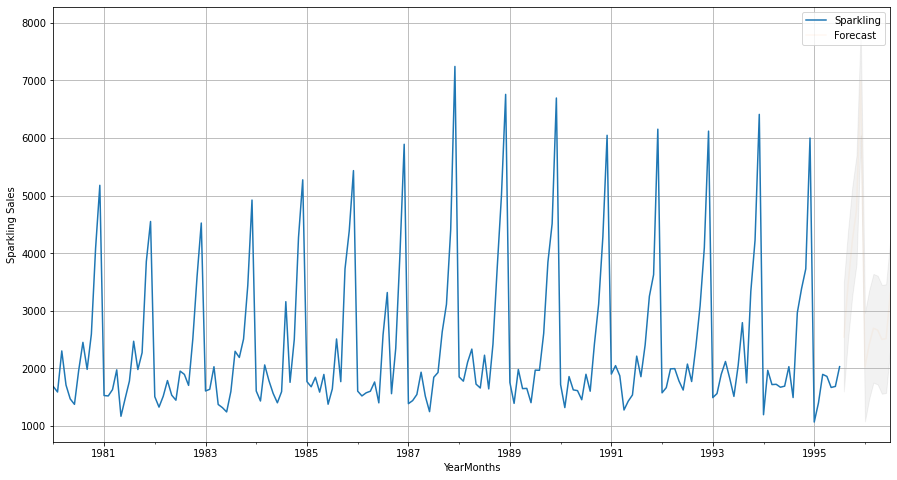

In [ ]:
axis = df_1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.05)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
fullmodel2 = sm.tsa.statespace.SARIMAX(df_1['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = fullmodel2.fit(maxiter=1000)
print(results_full_data_model.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                                 Statespace Model Results                                
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood               -1215.654
Date:                           Sat, 07 Nov 2020   AIC                           2449.309
Time:                                   20:40:00   BIC                           2477.262
Sample:                               01-31-1980   HQIC                          2460.656
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2385      1.171      0.204      0.839      -2.056       2.533
ar.L2         -0.0841      0.130     -0.645

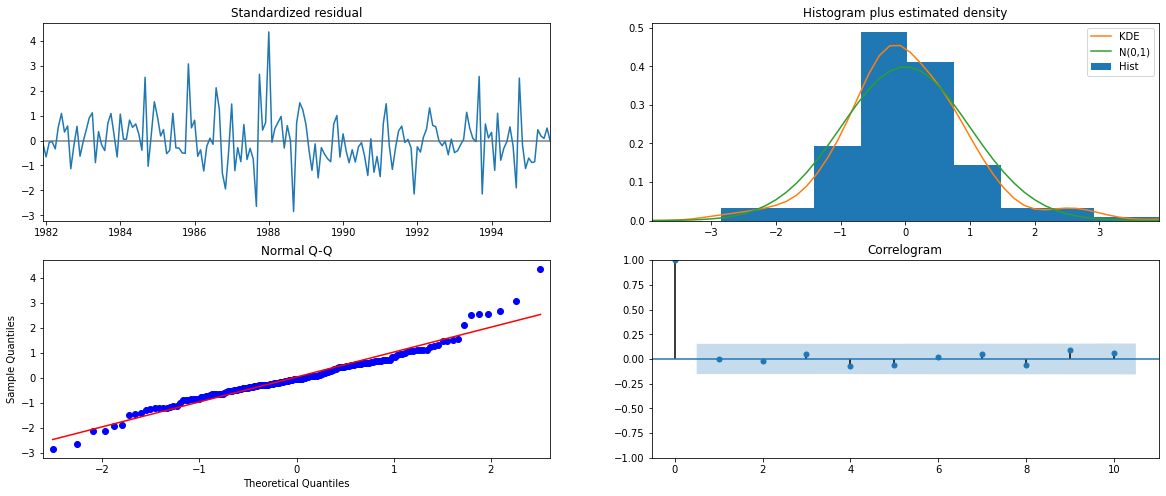

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1884.512765  379.577577    1140.554385    2628.471145
1995-09-30  2437.757125  385.097895    1682.979121    3192.535129
1995-10-31  3291.490870  385.119442    2536.670635    4046.311106
1995-11-30  3963.072864  385.452080    3207.600669    4718.545059
1995-12-31  6178.428748  386.197253    5421.496040    6935.361455

In [ ]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_1['Sparkling'],results_full_data_model.fittedvalues,squared=False)

print('RMSE :',RMSE_fullmodel2)


RMSE : 553.7969941145268


In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

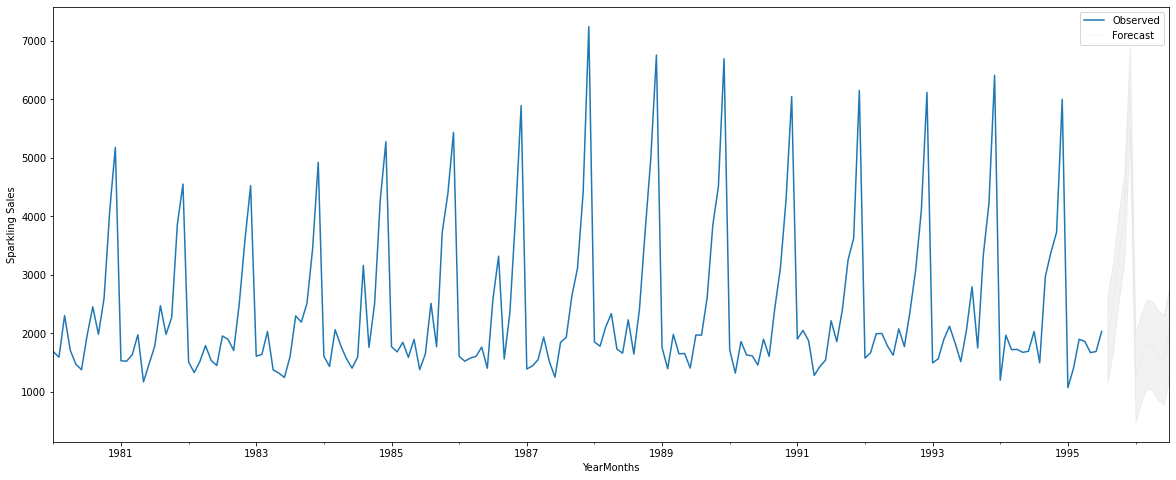

In [ ]:
axis = df_1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.05)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

In [ ]:
fullmodel3 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_models = fullmodel3.fit(maxiter=1000)
print(results_full_data_model_1.summary())


                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 07 Nov 2020   AIC                           1727.679
Time:                                   21:36:36   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6448      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1069      0.250     -0.428

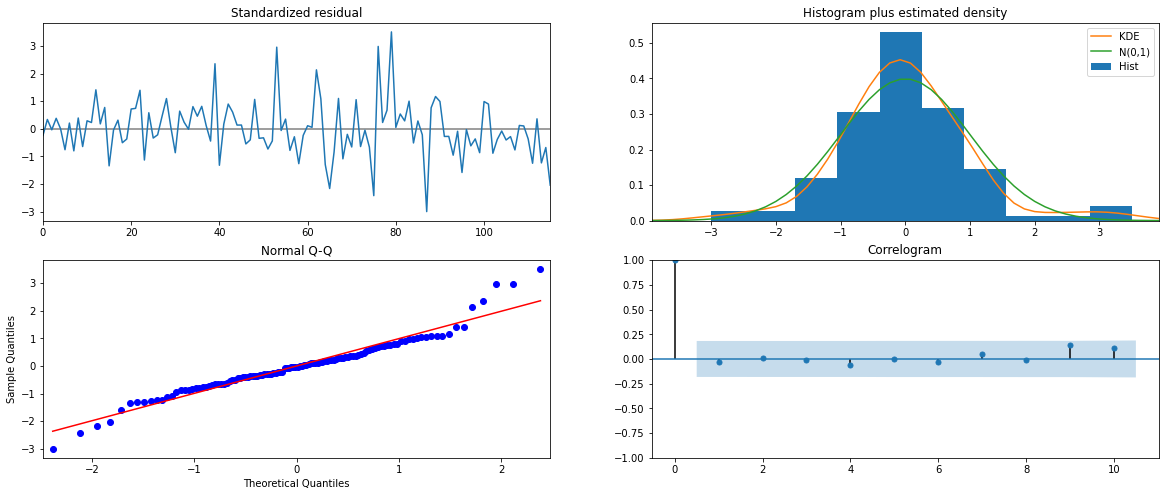

In [ ]:
results_full_data_model_1.plot_diagnostics();

In [ ]:
predicted_auto_SARIMA_full_data = results_full_data_models.get_forecast(steps=12)

In [ ]:
predicted_auto_SARIMA_full_data.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.429160  380.557404     584.550354    2076.307967
1  1177.323375  392.108946     408.803963    1945.842786
2  1625.955975  392.303298     857.055640    2394.856310
3  1546.337082  397.703204     766.853126    2325.821038
4  1308.774639  398.922974     526.899978    2090.649301

In [ ]:
pred_full_auto_SARIMA_date = predicted_auto_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

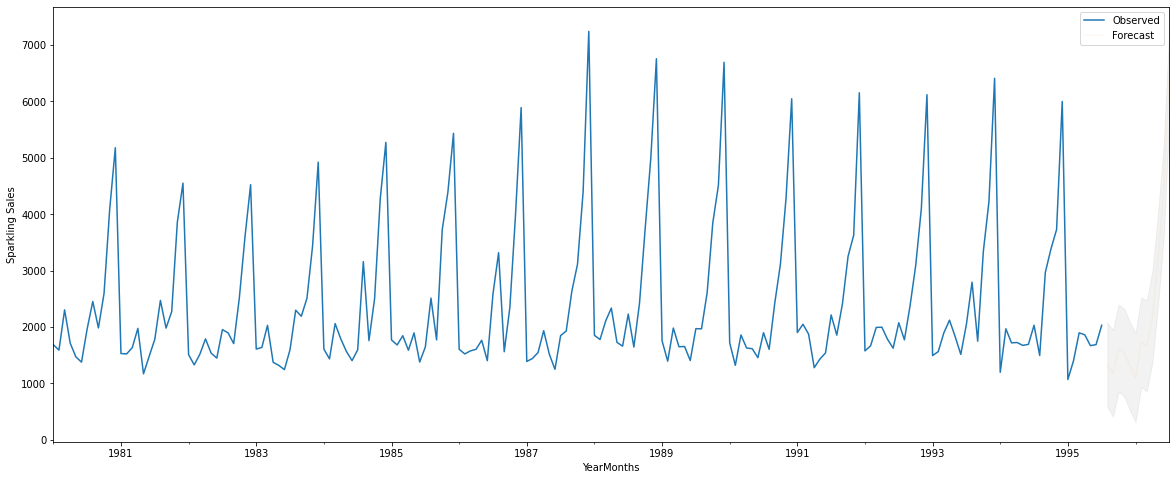

In [ ]:
axis = df_1['Sparkling'].plot(label='Observed')
pred_full_auto_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.05)
axis.fill_between(pred_full_auto_SARIMA_date.index, pred_full_auto_SARIMA_date['mean_ci_lower'], 
                  pred_full_auto_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()